In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import utils

In [2]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '.vscode',
 'dataset',
 'environment.yml',
 'heart_disease.ipynb',
 'images',
 'requirements.txt',
 'utils.py',
 '__pycache__']

In [3]:
CSV_PATH = 'dataset/heart.csv'
CSV_PATH = os.path.join(os.getcwd(), CSV_PATH)
heart_df = pd.read_csv(CSV_PATH)

In [4]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Dataset parameters

1.  **Age**
2.	**Sex** (0 – female and 1 – male)
3.	**cp**: chest pain type

    - (1): typical angina
    - (2): atypical angina
    - (3): non-anginal pain
    - (4): asymptomatic
    
4.	**trestbps**: resting blood pressure (in mm Hg on admission to the hospital)
5.	**chol**: serum cholesterol in mg/dl
6.	 **fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7.	**restecg**: resting electrocardiographic results

    - (0): normal
    - (1): having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - (2): showing probable or definite left ventricular hypertrophy by Estes' criteria
    
8.	**thalach**: maximum heart rate achieved
9.	**exang**: exercise induced angina (1 = yes; 0 = no)
10.	**oldpeak** = ST depression induced by exercise relative to rest
11.	**slope**: the slope of the peak exercise ST segment

    - (1): upsloping
    - (2): flat
    - (3): downsloping
    
12.	**ca**: number of major vessels (0-3) colored by flourosopy
13.	**thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect
14.	**target**: diagnosis of heart disease (angiographic disease status)

    - (0): < 50% diameter narrowing
    - (1): > 50% diameter narrowing (Predicted value)
    


In [5]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:xlabel='variable', ylabel='value'>

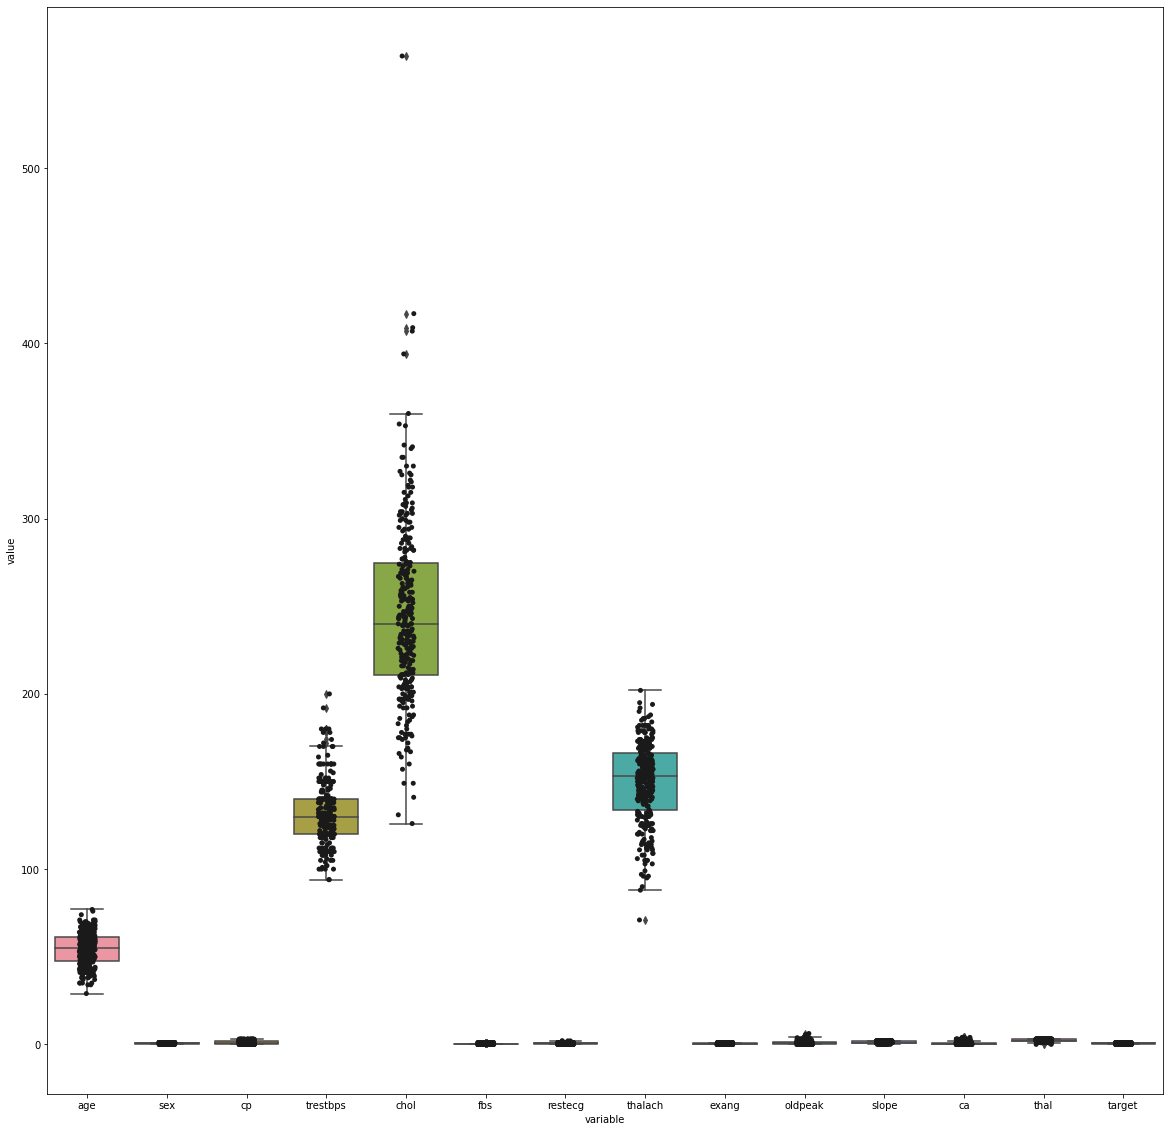

In [6]:
import seaborn as sns
_, ax = plt.subplots(figsize=(20, 20))
sns.boxplot(x="variable", y="value", data=pd.melt(heart_df), ax=ax)
sns.stripplot(x="variable", y="value", data=pd.melt(heart_df), ax=ax, color='.1')

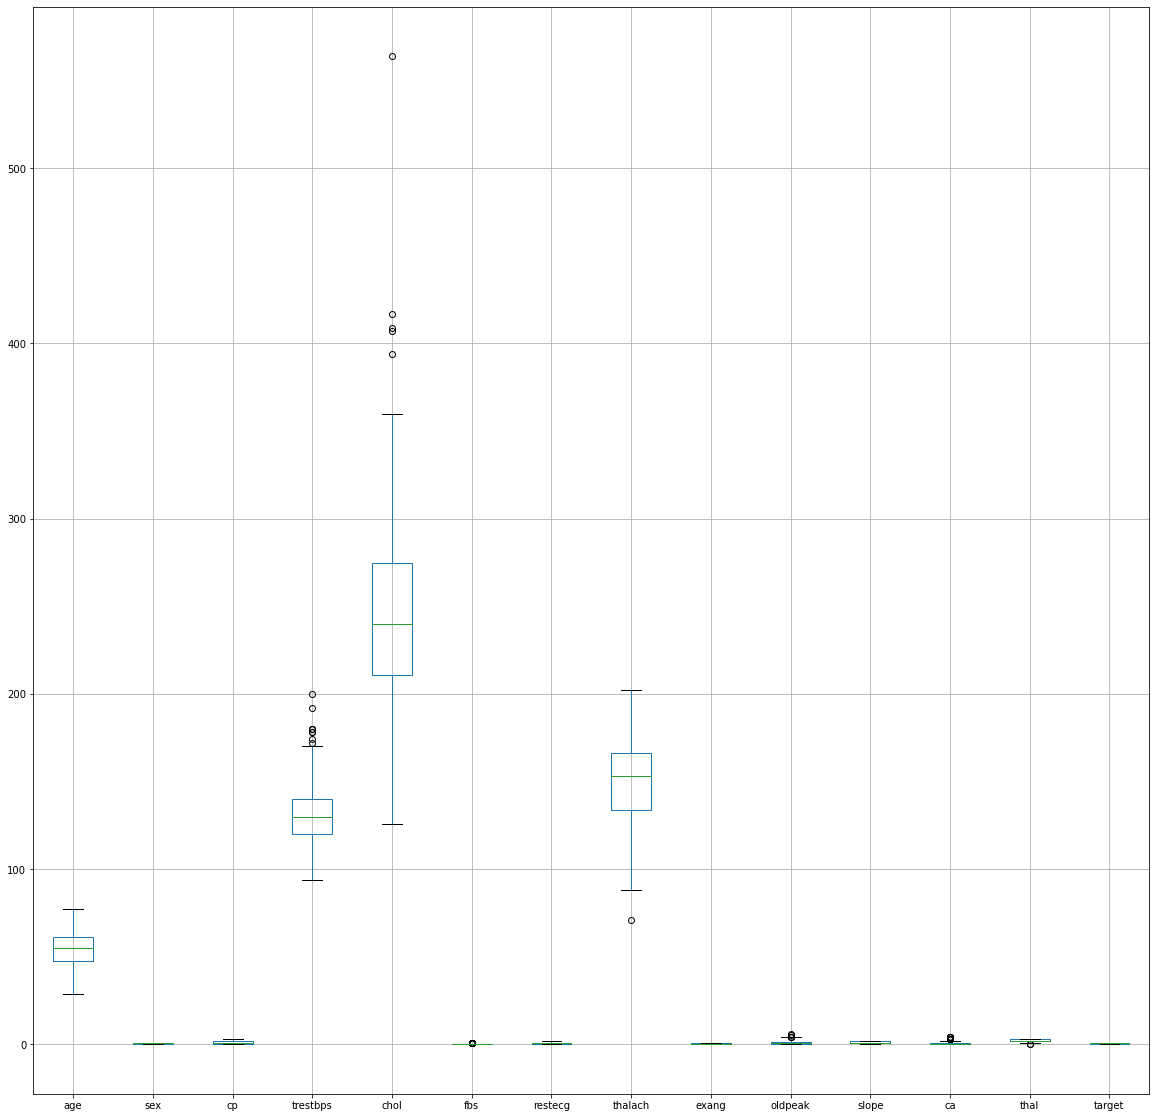

In [41]:
heart_df.boxplot(figsize=(20,20));

In [16]:
n_cols

13

Saving figure boxplot


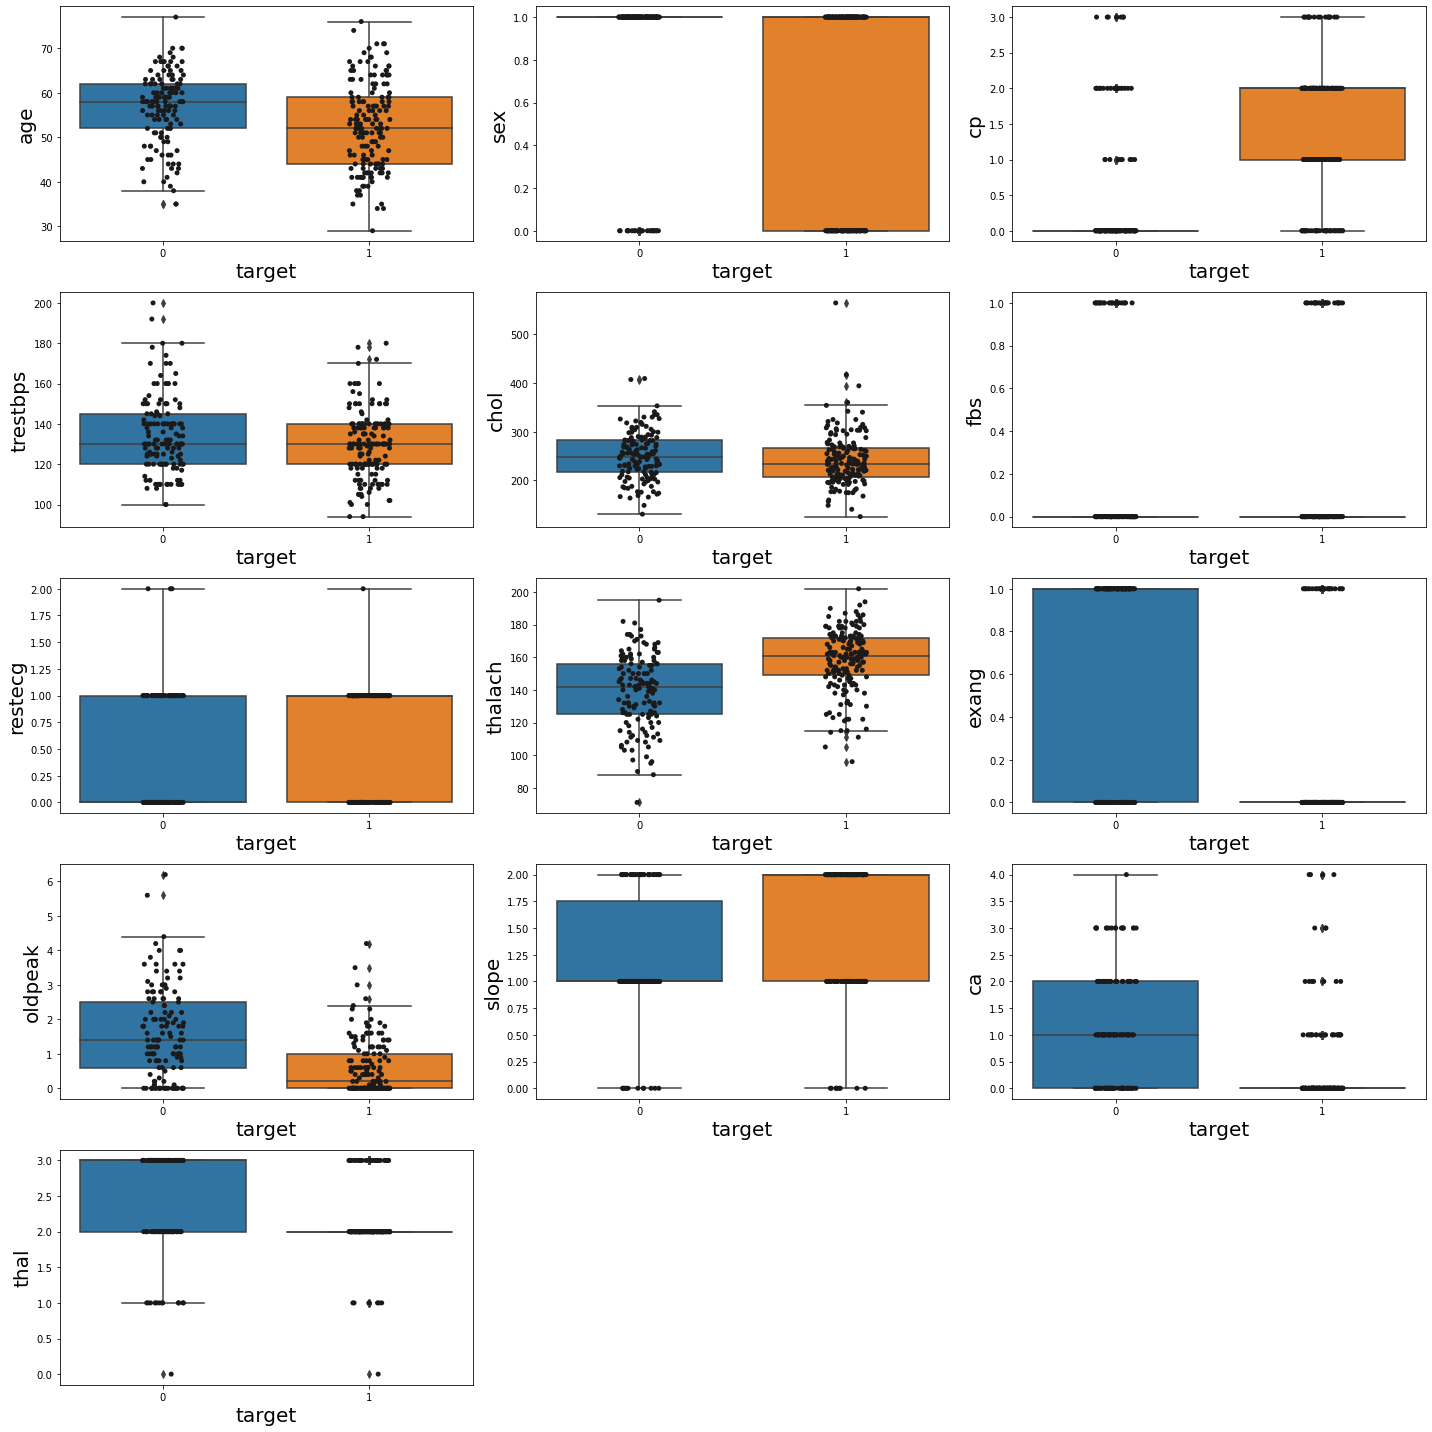

In [38]:
n_cols = len(heart_df.columns) - 1
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        idx = i*ax.shape[1] + j
        if not (idx > 12):
            col = heart_df.columns[idx]
            ax[i][j].xaxis.get_label().set_fontsize(20)
            ax[i][j].yaxis.get_label().set_fontsize(20)
            sns.boxplot(x='target', y=col, data=heart_df, ax=ax[i][j])
            sns.stripplot(x='target', y=col, data=heart_df, ax=ax[i][j], color='.1')
fig.delaxes(ax[4][1])
fig.delaxes(ax[4][2])
utils.save_fig('boxplot')

In [8]:
heart_df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64